<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Identification-and-Data-wrangling" data-toc-modified-id="Problem-Identification-and-Data-wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Identification and Data wrangling<a id="1_Problem_Identification_Data_wrangling"></a></a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction<a id="1.1_Introduction"></a></a></span></li><li><span><a href="#Problem-Identification" data-toc-modified-id="Problem-Identification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Identification<a id="1.2_Problem_Identification"></a></a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports<a id="1.3_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Loading the Data<a id="1.4_Loading_Data"></a></a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling<a id="2.0_Data_Wrangling"></a></a></span><ul class="toc-item"><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploring the Data<a id="2.1_Exploring_Data"></a></a></span><ul class="toc-item"><li><span><a href="#Finding-Missing-Values" data-toc-modified-id="Finding-Missing-Values-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Finding Missing Values<a id="2.2.1_Finding_Missing_Values"></a></a></span></li><li><span><a href="#Running-Pandas-Profiling-Report" data-toc-modified-id="Running-Pandas-Profiling-Report-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Running Pandas Profiling Report<a id="2.2.2_Running_Pandas_Profiling"></a></a></span></li></ul></li></ul></li></ul></div>

# Problem Identification and Data wrangling<a id='1_Problem_Identification_Data_wrangling'></a>

## Introduction<a id='1.1_Introduction'></a>

The focus of this step will be to source, collect, understand and organize the data. Some obvious data cleaning steps may be taken here but the overall focus will be on exploring the data to understand it better.

Data Source: https://www.kaggle.com/unitednations/international-energy-statistics

While the data for this project has been sourced from Kaggle from the above link, it was originally provided by the United Nations Statistics, a division on the UN Data site (source credit: http://data.un.org/Explorer.aspx).

The data science methodology for the overall analysis for this project is shown in the below picture:

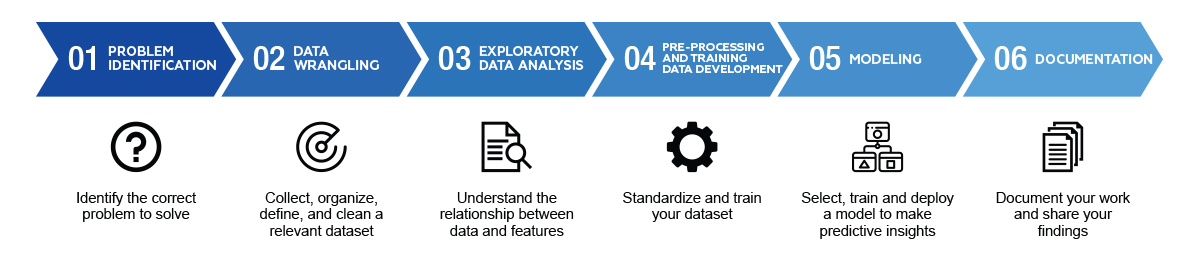

This data is very exhaustive in terms of commodity usage across various countries. For the purpose of this project, I will focus on finding out the energy consumption of mainly crude oil production and imports for the countries popularly known as G7. 

G7 is a term that is used to describe the Group of Seven. This is a group of seven countries that have the largest and most advanced economies in the world. These are the most industrialized nations in the world.

When breaking down the numbers, the G7 countries represent over 46% of the gross domestic product globally based on nominal values. These countries represent over 32% of the GDP based on purchasing power parity. The countries in this group have more than 62% of the global net wealth – or a total of $280 trillion.

The nations that are part of G7 include United States, Canada, Germany, France, Italy, Japan and United Kingdom.

Source for Reference: https://worldpopulationreview.com/country-rankings/g7-countries

Since the focus is only up to stage 3 i.e. Exploratory Data Analysis, steps from stage4 onward are not done as part of this project.

## Problem Identification<a id='1.2_Problem_Identification'></a>

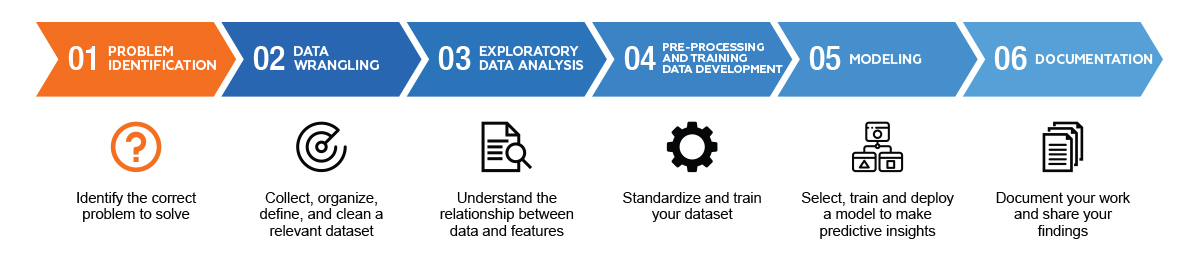

The main focus of this dataset is to learn more about the Conventional Crude Oil production and imports in the G7 countries. Hence the focus will be on the presentation of the facts as per the following for each G7 country i.e. Canada, United States, United Kingdom, Germany, France, Italy and Japan:

* Crude Oil production and imports
* Comparative plot for the production and imports among the G7 countries

## Imports<a id='1.3_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file

import missingno as msno
from pandas_profiling import ProfileReport

## Loading the Data<a id='1.4_Loading_Data'></a>

In [2]:
# Loading the csv data file here
energy = pd.read_csv('../EnergyStats/raw-data/all_energy_statistics.csv')

In [3]:
# Calling the info() method to look at the summary of the data
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


From the above data, it is clear that there are a total of 1,189,482 rows and 7 columns. From the high level view for the information presented, it seems that 'quantity_footnotes' column has many missing values.

In [4]:
# Calling the head method to view the data
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


# Data Wrangling<a id='2.0_Data_Wrangling'></a>

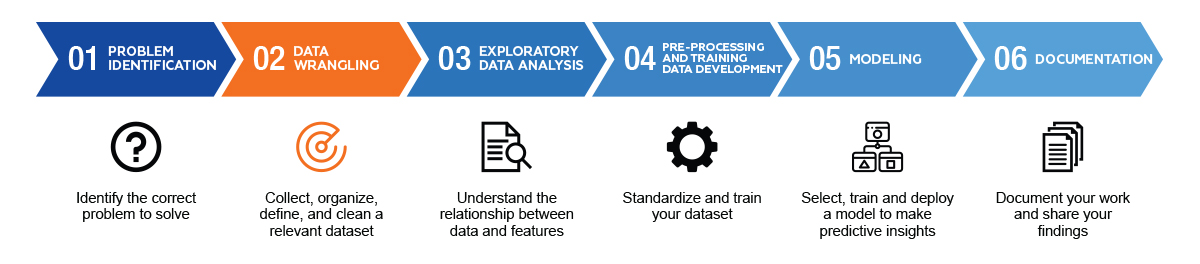

## Exploring the Data<a id='2.1_Exploring_Data'></a>

In [5]:
# Finding out overall structure of the dataset
energy.shape

(1189482, 7)

In [6]:
# calling the unique method to explore the list of countries and area
energy.country_or_area.unique()

array(['Austria', 'Belgium', 'Czechia', 'Finland', 'France', 'Greece',
       'Hungary', 'Italy', 'Korea, Republic of', 'Netherlands', 'Romania',
       'Serbia', 'Slovakia', 'Ukraine', 'United Kingdom', 'United States',
       'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile', 'Croatia',
       'Iran (Islamic Rep. of)', 'Jordan', 'Lithuania', 'Mexico', 'Oman',
       'Other Asia', 'Poland', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'T.F.Yug.Rep. Macedonia', 'Turkey', 'Uzbekistan',
       'Argentina', 'Colombia', 'Germany', 'Norway', 'Australia',
       'China, Macao SAR', 'Japan', 'Denmark', 'Ireland', 'Philippines',
       'Bangladesh', 'Eritrea', 'Ethiopia', 'Lesotho', 'Nepal', 'Niger',
       'Pakistan', 'Serbia and Montenegro', 'Tunisia', 'Botswana',
       'Georgia', 'Republic of Moldova', 'Peru', 'South Africa',
       'Iceland', 'Latvia', 'Luxembourg', 'Cuba', 'Kyrgyzstan',
       'Singapore', 'Thailand', 'United Arab Emirates', 'Uruguay',
       'Armenia', 'Fiji', 

From the above data, it is clear that there are many areas captured under the 'country_or_area' category. Since our focus is on the group of 7 countries i.e. United States, Canada, Germany, France, Italy, Japan and United Kingdom.

In [7]:
# learning more about the 'commodity_transaction' feature
list(energy['commodity_transaction'].unique())

['Additives and Oxygenates - Exports',
 'Additives and Oxygenates - Imports',
 'Additives and Oxygenates - Production',
 'Additives and Oxygenates - Receipts from other sources',
 'Additives and Oxygenates - Stock changes',
 'Additives and Oxygenates - Total energy supply',
 'Additives and Oxygenates - transfers and recycled products',
 'Additives and Oxygenates - Transformation',
 'Additives and Oxygenates - Transformation in oil refineries',
 'Animal waste - Consumption by commerce and public services',
 'Animal waste - Consumption by food and tobacco ',
 'Animal waste - Consumption by households',
 'Animal waste - Consumption by manufacturing, construction and non-fuel industry',
 'Animal waste - Consumption by non-metallic minerals ',
 'Animal waste - Consumption by other',
 'Animal waste - Consumption by other manuf., const. and non-fuel min. ind.',
 'Animal waste - Consumption in agriculture, forestry and fishing',
 'Animal waste - Consumption not elsewhere specified (industry)',

Since there are a lot of categories, it is better to find out the total numbers.

In [8]:
# learning more about the categories
energy['category'].unique()

array(['additives_and_oxygenates', 'animal_waste', 'anthracite',
       'aviation_gasoline', 'bagasse', 'biodiesel', 'biogases',
       'biogasoline', 'bitumen', 'black_liquor', 'blast_furnace_gas',
       'brown_coal_briquettes', 'brown_coal', 'charcoal', 'coal_tar',
       'coke_oven_coke', 'coking_coal', 'conventional_crude_oil',
       'direct_use_of_geothermal_heat',
       'direct_use_of_solar_thermal_heat',
       'electricity_net_installed_capacity_of_electric_power_plants',
       'ethane', 'falling_water', 'fuel_oil', 'fuelwood', 'gas_coke',
       'gas_oil_diesel_oil', 'gasoline_type_jet_fuel', 'gasworks_gas',
       'geothermal', 'hard_coal', 'heat', 'hydro', 'industrial_waste',
       'kerosene_type_jet_fuel', 'lignite', 'liquified_petroleum_gas',
       'lubricants', 'motor_gasoline', 'municipal_wastes', 'naphtha',
       'natural_gas_including_lng', 'natural_gas_liquids',
       'nuclear_electricity', 'of_which_biodiesel',
       'of_which_biogasoline', 'oil_shale_oil_sa

In [9]:
# since there are many category values and commodity_transaciton values, checking the quantum of these types
print("Total number of categories are: ", energy['category'].value_counts().count())
print("Total number of commodity transactions are: ", energy['commodity_transaction'].value_counts().count())

Total number of categories are:  71
Total number of commodity transactions are:  2452


In [10]:
# now focusing on the years to see the range of the data available
energy.year.unique()

array([1996, 1995, 2014, 2013, 2012, 2011, 2010, 2009, 1998, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1997, 1994, 1993,
       1992, 1991, 1990], dtype=int64)

This suggests that the data available here is from 1990 to 2014.

In [11]:
# Running the describe method to see the output
energy.describe()

,year,quantity,quantity_footnotes
count,1.189482e+06,1.189482e+06,163946.0
mean,2.002852e+03,1.842648e+05,1.0
std,7.167345e+00,1.585663e+07,0.0
min,1.990000e+03,-8.643480e+05,1.0
25%,1.997000e+03,1.400000e+01,1.0
50%,2.003000e+03,1.890000e+02,1.0
75%,2.009000e+03,2.265000e+03,1.0
max,2.014000e+03,6.680329e+09,1.0


The above analysis confirms that year column is in the int format rather than the datetime and quantity_footnotes column seems to have a lot of missing values.

### Finding Missing Values<a id='2.2.1_Finding_Missing_Values'></a>

<AxesSubplot:>

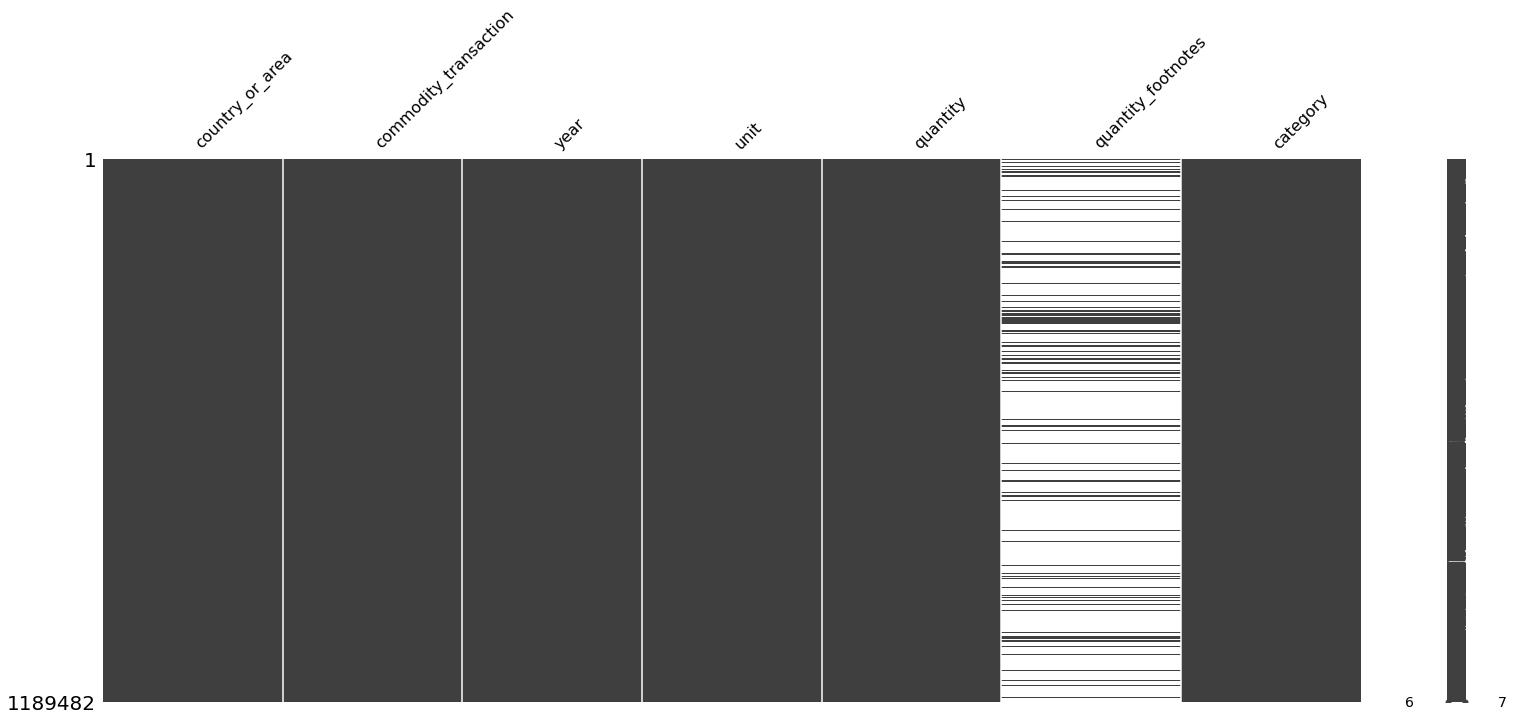

In [12]:
# Using the missingno package to run the matrix
msno.matrix(energy)

In [13]:
# also checking the normal way if there are any missing values in any other column
missing = pd.concat([energy.isnull().sum(), energy.isnull().mean() * 100], axis=1)
missing.columns = ['Count', '%']
missing.sort_values(by='Count', ascending=False)

,Count,%
quantity_footnotes,1025536,86.217026
country_or_area,0,0.000000
commodity_transaction,0,0.000000
year,0,0.000000
unit,0,0.000000
quantity,0,0.000000
category,0,0.000000


Based on the above, it is obvious that there are a lots of missing values for the quantity_footnotes and I am going to drop it now.

In [14]:
# dropping 'quantity_footnotes' column
energy.drop('quantity_footnotes', axis=1, inplace=True)

In [15]:
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates


### Running Pandas Profiling Report<a id='2.2.2_Running_Pandas_Profiling'></a>

In [16]:
# running pandas profiling report to get full insights on the dataset
profile = ProfileReport(energy, title="Pandas Profiling Report")

In [17]:
profile

In [18]:
# filtering the list of countries now focusing on the G7
usa = energy[energy['country_or_area']=='United States'].sort_values('year')
uk = energy[energy['country_or_area']=='United Kingdom'].sort_values('year')
canada = energy[energy['country_or_area']=='Canada'].sort_values('year')
germany = energy[energy['country_or_area']=='Germany'].sort_values('year')
france = energy[energy['country_or_area']=='France'].sort_values('year')
italy = energy[energy['country_or_area']=='Italy'].sort_values('year')
japan = energy[energy['country_or_area']=='Japan'].sort_values('year')
group7 = energy[energy.country_or_area.isin(
    ['United States','United Kingdom','Canada','Germany','France','Italy','Japan'])].sort_values('year')

In [19]:
group7.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1189460,United States,Electricity - total wind production,1990,"Kilowatt-hours, million",3066.0,wind_electricity
47270,France,Biogases - Consumption by other,1990,Terajoules,2008.0,biogases
979367,Japan,Patent fuel - Final energy consumption,1990,"Metric tons, thousand",120.0,patent_fuel
391080,United Kingdom,Gas Oil/ Diesel Oil - Consumption by households,1990,"Metric tons, thousand",286.0,gas_oil_diesel_oil
390429,Italy,Gas Oil/ Diesel Oil - Consumption by households,1990,"Metric tons, thousand",7048.0,gas_oil_diesel_oil


In [20]:
# making sure all labels are lower in category
group7['category'].str.lower()

1189460             wind_electricity
47270                       biogases
979367                   patent_fuel
391080            gas_oil_diesel_oil
390429            gas_oil_diesel_oil
                     ...            
843255     natural_gas_including_lng
276236                      fuel_oil
1078838            total_electricity
304987                      fuel_oil
26          additives_and_oxygenates
Name: category, Length: 121843, dtype: object

In [21]:
# making sure all labels are lower in commodity_transaction
group7['commodity_transaction'].str.lower()

1189460                  electricity - total wind production
47270                        biogases - consumption by other
979367                patent fuel - final energy consumption
391080       gas oil/ diesel oil - consumption by households
390429       gas oil/ diesel oil - consumption by households
                                 ...                        
843255     natural gas (including lng) - transformation i...
276236     fuel oil - consumption by other manuf., const....
1078838    electricity - consumption by wood and wood pro...
304987              fuel oil - other energy industry own use
26                        additives and oxygenates - exports
Name: commodity_transaction, Length: 121843, dtype: object

In [22]:
# save the group7 data to a new csv file
datapath = '../EnergyStats/data'
save_file(group7, 'group7_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../EnergyStats/data\group7_cleaned.csv"


In [23]:
# save the energy data to a new csv file
datapath = '../EnergyStats/data'
save_file(energy, 'energy_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../EnergyStats/data\energy_cleaned.csv"


For the EDA file, please go to %% https://github.com/jayguptacal/portfolio/blob/main/EnergyStats/Energy_Stats_EDA.ipynb